In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [13]:
# create random dataset
x, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [7]:
# create class model
class LogisticModel(nn.Module):
    def __init__(self):
        super(LogisticModel, self).__init__()
        self.linear = nn.Linear(2, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [8]:
# define mode and its hyperparamters
model = LogisticModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [ ]:
# training set
epochs = 5000
losses = []
for epoch in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"epoch {epoch}, loss: {loss.item():.4f}")

In [35]:
# visualize model and dataset
x1, x2 = torch.meshgrid(
    torch.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    torch.linspace(X[:, 1].min(), X[:, 1].max(), 100),
)
grid = torch.cat([x1.reshape(-1, 1), x2.reshape(-1, 1)], dim=1)
preds = model(grid).detach().numpy().reshape(100, 100)

tensor([[-3.1219, -3.1219, -3.1219,  ..., -3.1219, -3.1219, -3.1219],
        [-3.0534, -3.0534, -3.0534,  ..., -3.0534, -3.0534, -3.0534],
        [-2.9848, -2.9848, -2.9848,  ..., -2.9848, -2.9848, -2.9848],
        ...,
        [ 3.5262,  3.5262,  3.5262,  ...,  3.5262,  3.5262,  3.5262],
        [ 3.5948,  3.5948,  3.5948,  ...,  3.5948,  3.5948,  3.5948],
        [ 3.6633,  3.6633,  3.6633,  ...,  3.6633,  3.6633,  3.6633]])


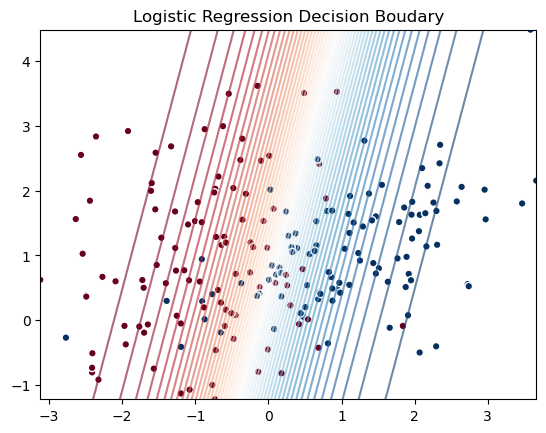

In [ ]:
# plot decision boundary
plt.contour(x1, x2, preds, levels=50, cmap="RdBu", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="white", s=20)
plt.title("Logistic Regression Decision Boudary")
plt.show()

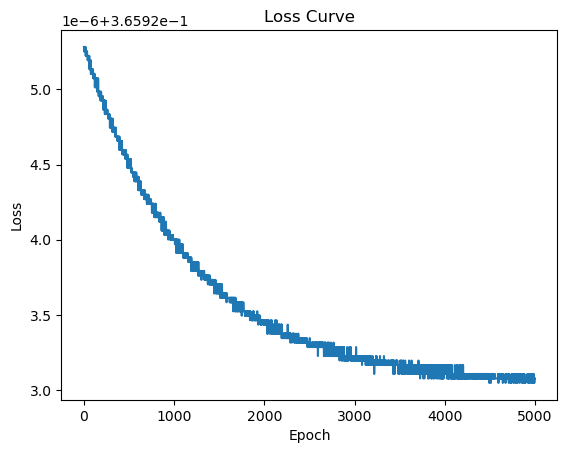

In [27]:
# plot the loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()